In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/f7/ktht5d1s70d5b54zrw1g_fjh0000gn/T/ipykernel_22226/2106068084.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


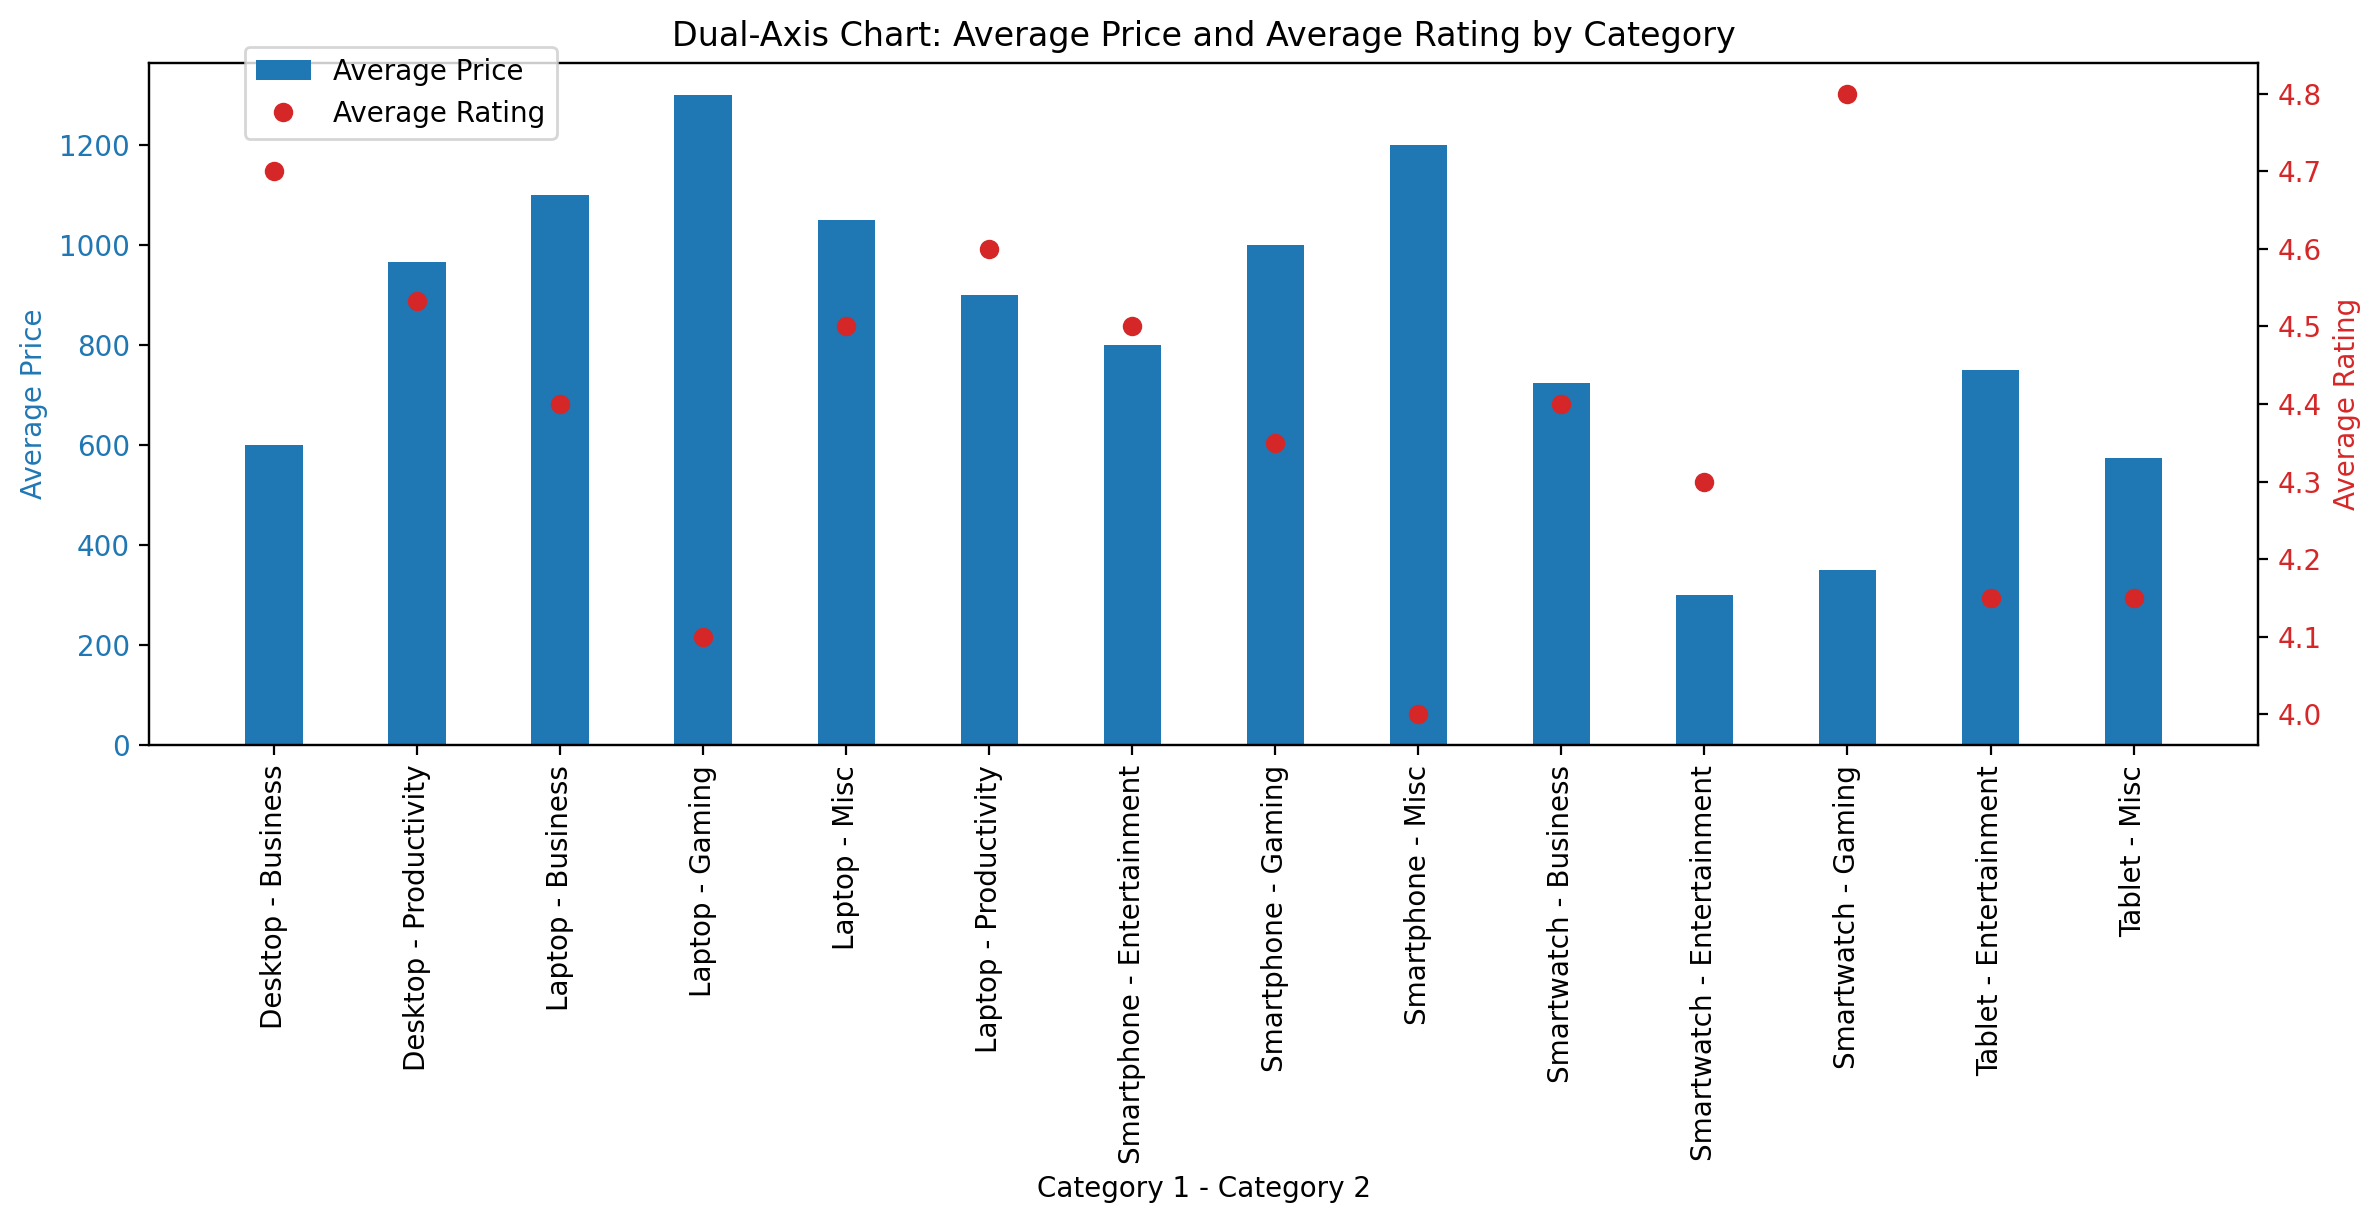

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Sample data
categories_1 = ["Laptop", "Smartphone", "Tablet", "Desktop", "Smartwatch"] * 4
categories_2 = ["Gaming", "Productivity", "Entertainment", "Business", "Misc"] * 4

# Shuffle the order of Category 1 and Category 2 values to randomize associations
random.shuffle(categories_1)
random.shuffle(categories_2)

data = {
    "Category 1": categories_1,
    "Category 2": categories_2,
    "Average Price": [800, 1000, 500, 1200, 300, 900, 400, 1500, 600, 1100,
                      750, 850, 550, 1300, 350, 950, 450, 1400, 650, 1050],
    "Average Rating": [4.5, 4.2, 4.8, 4.0, 4.3, 4.6, 4.1, 3.9, 4.7, 4.4,
                       4.2, 4.5, 4.3, 4.1, 4.8, 4.0, 4.6, 4.4, 4.7, 4.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by both "Category 1" and "Category 2" and calculate metrics
result = df.groupby(["Category 1", "Category 2"]).agg({
    "Average Price": "mean",
    "Average Rating": "mean"
}).reset_index().sort_values('Average Price', ascending = False)

# Create a dual-axis chart to visualize the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average price on the primary y-axis (left)
ax1.bar(result.index, result["Average Price"], width=0.4, label="Average Price")
ax1.set_xlabel("Category 1 - Category 2")
ax1.set_ylabel("Average Price", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a secondary y-axis (right) for average rating
ax2 = ax1.twinx()
ax2.plot(result.index, result["Average Rating"], marker="o", linestyle='', color="tab:red", label="Average Rating")
ax2.set_ylabel("Average Rating", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Set x-axis labels and tick positions
ax1.set_xticks(result.index)
ax1.set_xticklabels(result["Category 1"] + " - " + result["Category 2"], rotation=90)

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1))

# Show the chart
plt.title("Dual-Axis Chart: Average Price and Average Rating by Category")
plt.show()


/Users/jungh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jungh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jungh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jungh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

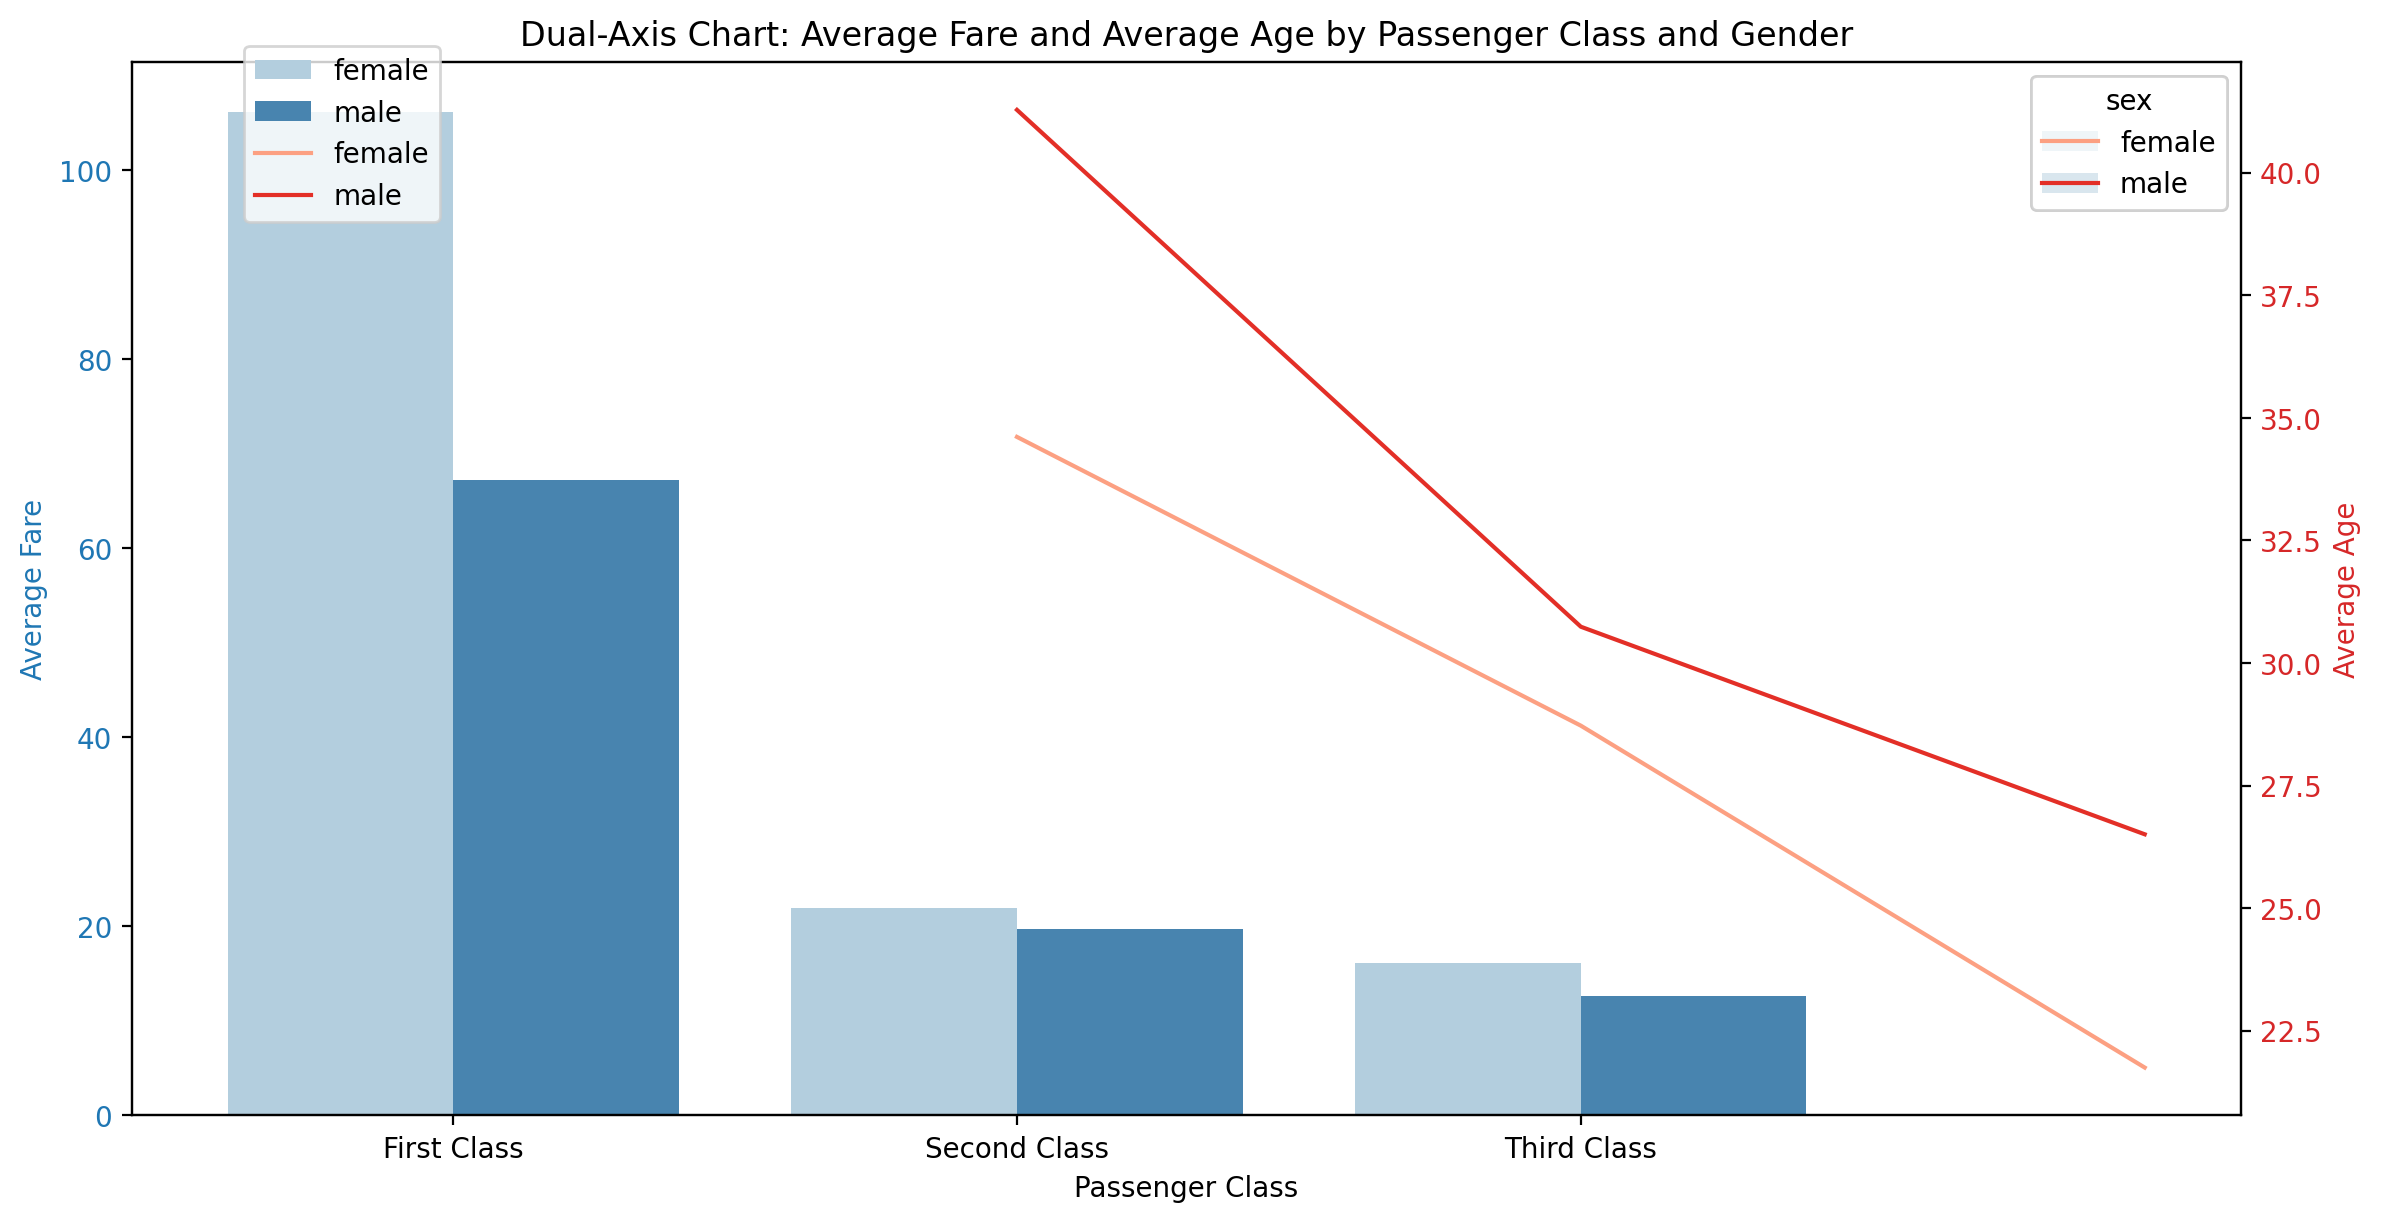

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic_data = pd.read_csv('titanic.csv')
titanic_data.columns = titanic_data.columns.str.lower()
titanic_data['class'] = titanic_data['pclass']

# Group by passenger class and gender and calculate metrics
result = titanic_data.groupby(["class", "sex"]).agg({
    "fare": "mean",
    "age": "mean"
}).reset_index()

# Create a dual-axis chart to visualize the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average fare on the primary y-axis (left)
sns.barplot(data=result, x="class", y="fare", hue="sex", ax=ax1, palette="Blues")
ax1.set_xlabel("Passenger Class")
ax1.set_ylabel("Average Fare", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a secondary y-axis (right) for average age
ax2 = ax1.twinx()
sns.lineplot(data=result, x="class", y="age", hue="sex", ax=ax2, markers=True, ci=None, palette="Reds")
ax2.set_ylabel("Average Age", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Set x-axis labels
ax1.set_xticklabels(["First Class", "Second Class", "Third Class"])

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1))

# Show the chart
plt.title("Dual-Axis Chart: Average Fare and Average Age by Passenger Class and Gender")
plt.show()


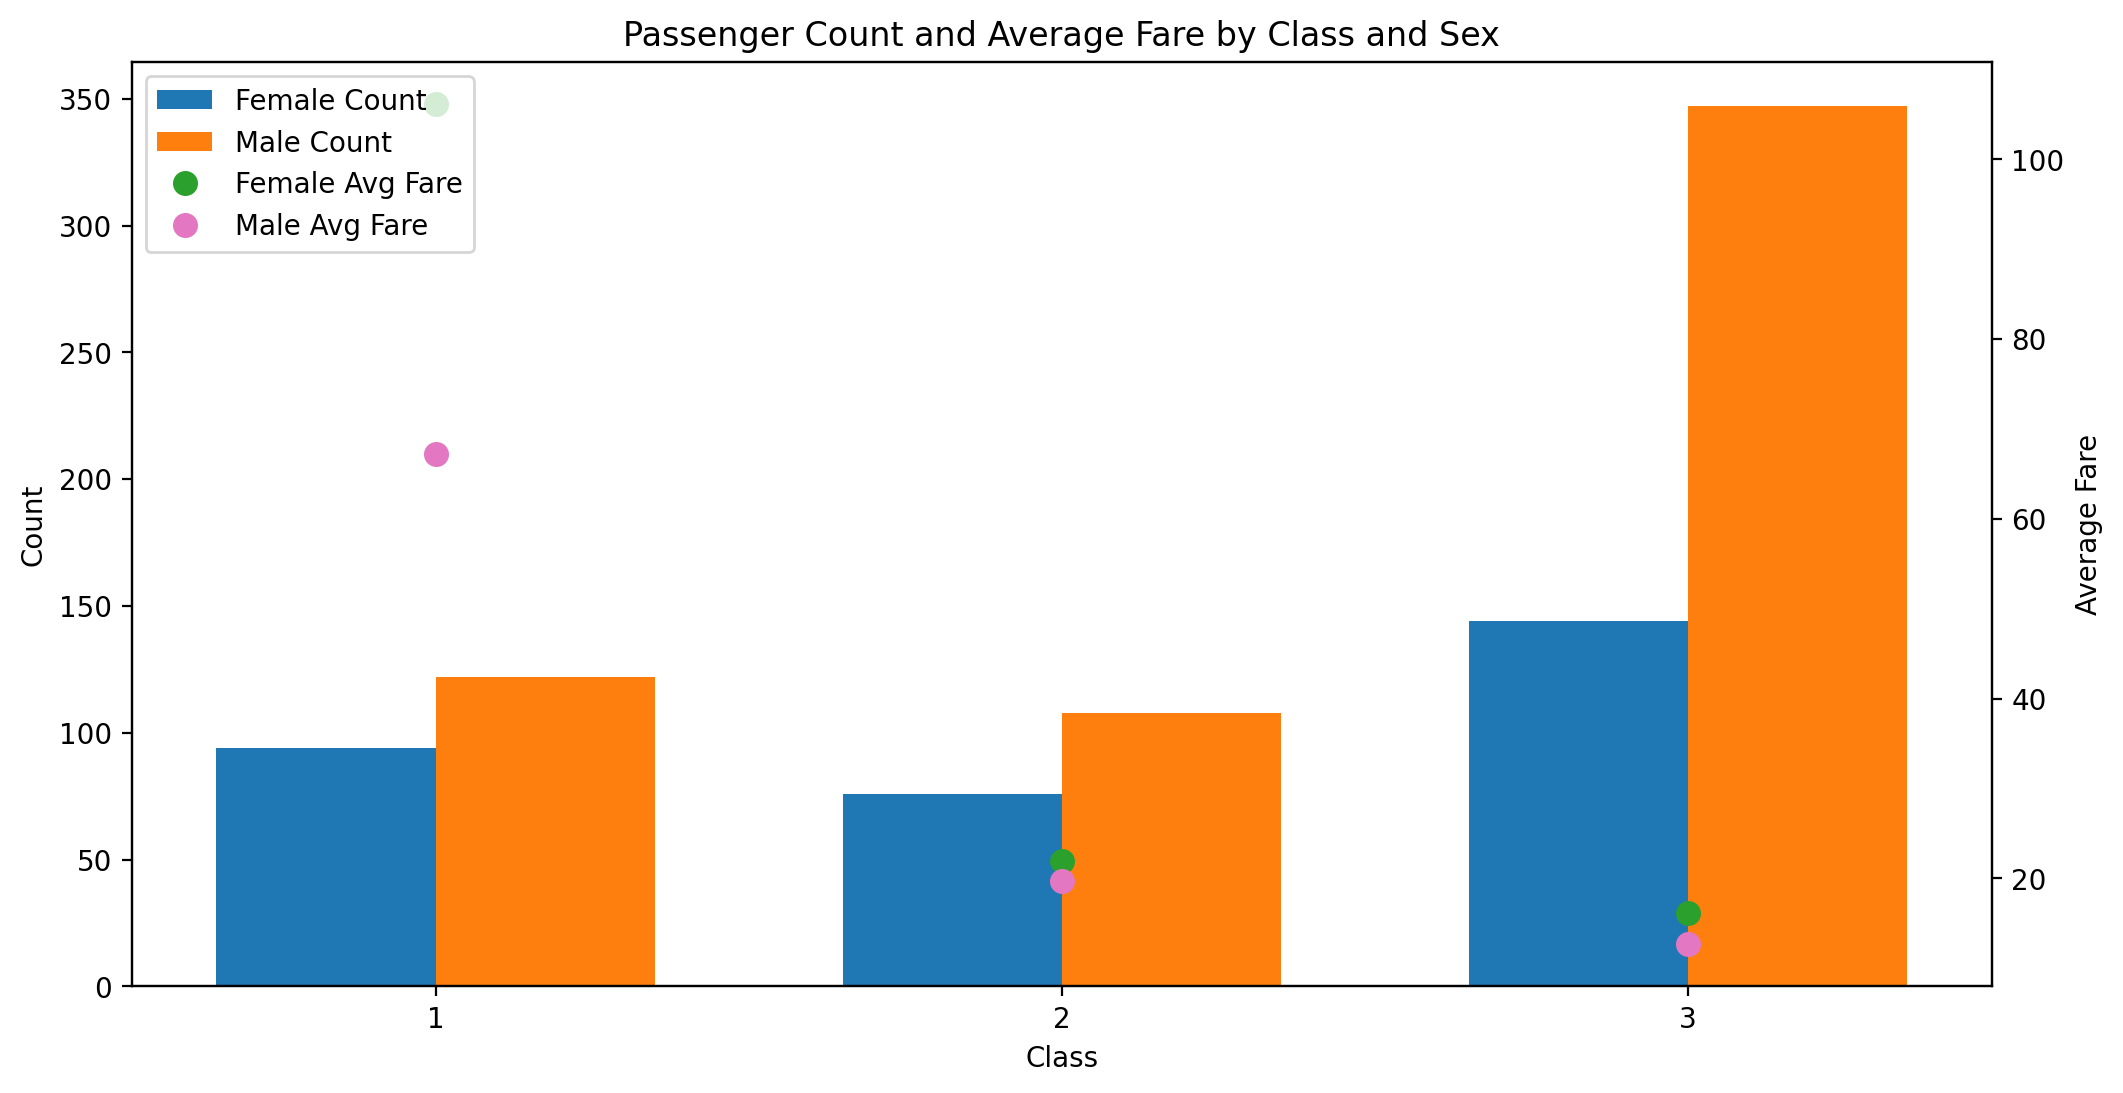

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset from a CSV file
titanic_data = pd.read_csv('titanic.csv')

# Group by passenger class, sex, and calculate the count of passengers and average fare
result = titanic_data.groupby(['Pclass', 'Sex']).agg({
    'Survived': 'count',
    'Fare': 'mean'
}).unstack()

# Create a multi-series bar chart with bars side by side for each class and sex
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
index = result.index

ax.bar(index - width / 2, result[('Survived', 'female')], width=width, label='Female Count', color='tab:blue')
ax.bar(index + width / 2, result[('Survived', 'male')], width=width, label='Male Count', color='tab:orange')

# Create a secondary y-axis (right) for average fare
ax2 = ax.twinx()
ax2.plot(index, result[('Fare', 'female')], marker='o', markersize=8, linestyle='', color='tab:green', label='Female Avg Fare')
ax2.plot(index, result[('Fare', 'male')], marker='o', markersize=8, linestyle='', color='tab:pink', label='Male Avg Fare')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax2.set_ylabel('Average Fare')
plt.title('Passenger Count and Average Fare by Class and Sex')

# Add a legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set x-axis tick labels
ax.set_xticks(index)
ax.set_xticklabels(index)

# Show the chart
plt.show()


In [209]:
import pandas as pd
import random

# Generate a list of departments
departments = ['HR', 'Finance', 'Marketing', 'Sales', 'Engineering']

# Create an empty list to store data
data = []

# Generate dummy data
for _ in range(100):
    month = random.choice(['January', 'February', 'March'])
    department = random.choice(departments)
    employee_name = f'Employee{_ + 1}'
    spending_amount = round(random.uniform(1000, 5000), 2)
    
    # Check for duplicate employee names in different departments
    while any((d['Employee Name'] == employee_name) and (d['Department'] != department) for d in data):
        employee_name = f'Employee{_ + 1}'
    
    data.append({
        'Month': month,
        'Department': department,
        'Employee Name': employee_name,
        'Spending Amount': spending_amount
    })

# Create a DataFrame
df = pd.DataFrame(data)


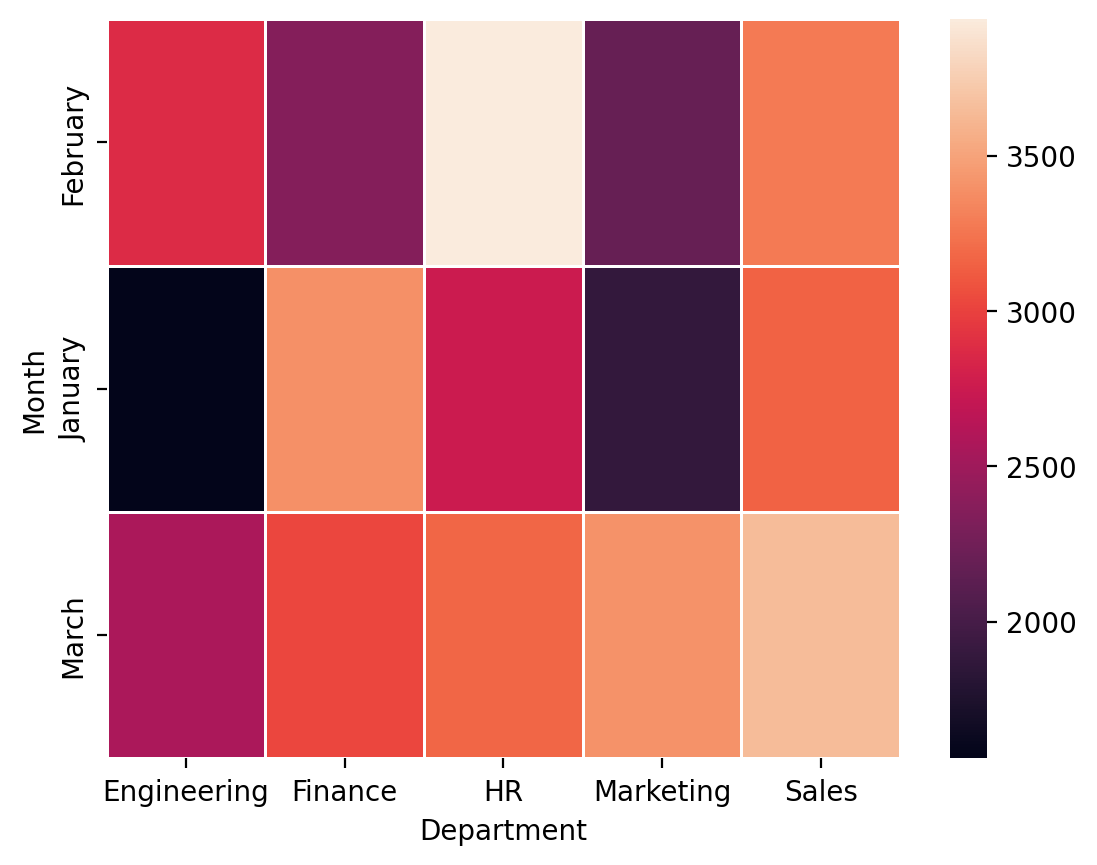

In [22]:
import seaborn as sns

m = df.groupby(['Month','Department'])['Spending Amount'].mean().unstack()

sns.heatmap(m, linewidth=0.5);

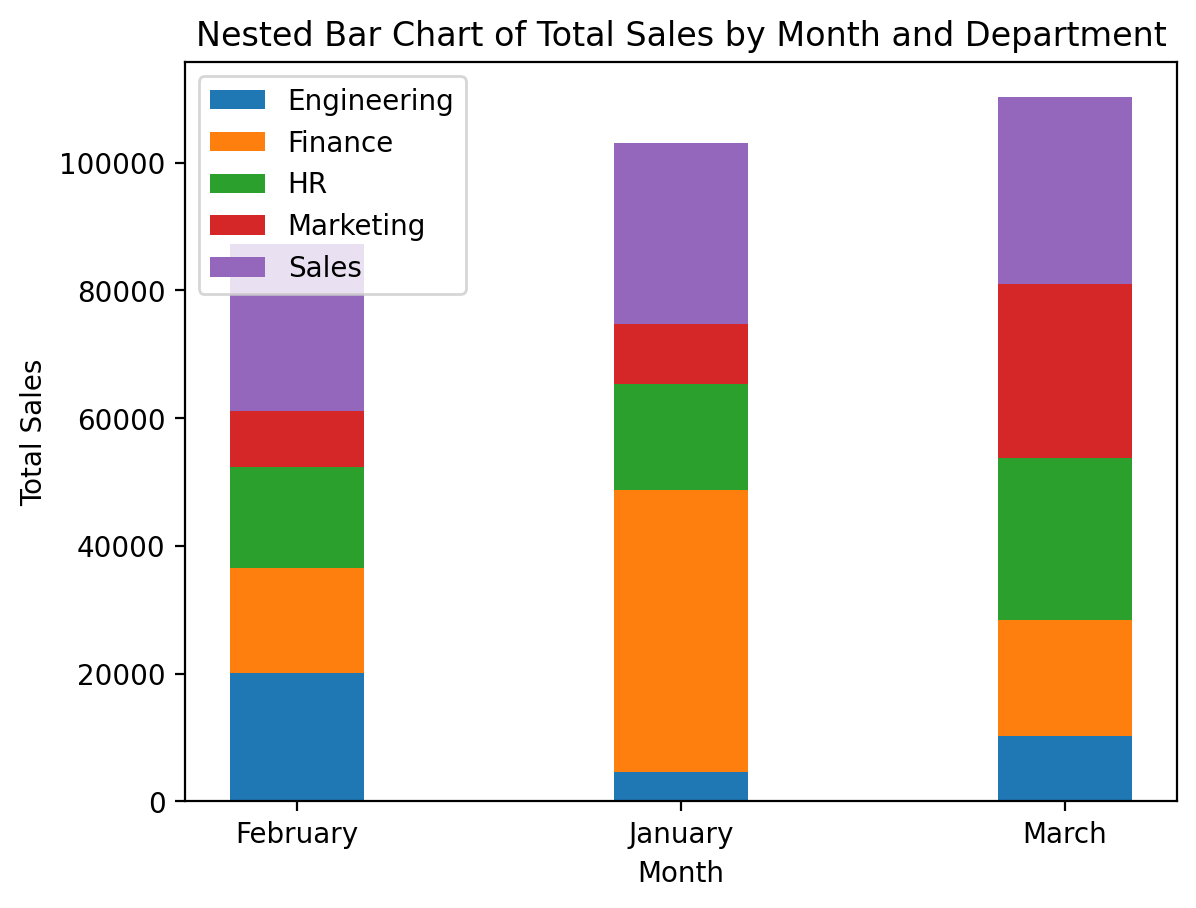

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data)

# Group by Month and Department and calculate the total sales
grouped = df.groupby(['Month', 'Department'])['Spending Amount'].sum().unstack(fill_value=0)

# Create a nested bar chart
fig, ax = plt.subplots()
width = 0.35
index = grouped.index
departments = grouped.columns

bottom = None
for department in departments:
    sales = grouped[department]
    bars = ax.bar(index, sales, width, label=department, bottom=bottom)
    bottom = sales if bottom is None else bottom + sales

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Nested Bar Chart of Total Sales by Month and Department')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.show()


In [6]:
# Group the data by 'Month' and 'Department' and calculate the average spending amount
average_spending = df.groupby(['Month', 'Department'])['Spending Amount'].mean().reset_index()

# Create a nested pie chart
fig, ax = plt.subplots()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate the total average spending amount
total_average = average_spending['Spending Amount'].mean()

# Create outer pie chart for 'Month'
outer_labels = average_spending['Month']
outer_sizes = average_spending.groupby('Month')['Spending Amount'].sum()
outer_colors = plt.cm.Paired(range(len(outer_sizes)))

ax.pie(outer_sizes, labels=outer_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=outer_colors)

# Create inner pie chart for 'Department' within each 'Month' segment
for month in average_spending['Month'].unique():
    inner_data = average_spending[average_spending['Month'] == month]
    inner_labels = inner_data['Department']
    inner_sizes = inner_data['Spending Amount']
    inner_colors = plt.cm.Paired(range(len(inner_sizes)))

    ax.pie(inner_sizes, labels=inner_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.65, colors=inner_colors, radius=0.75)

# Add a central circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(center_circle)

# Add a title and display the chart
plt.title('Nested Pie Chart: Average Spending Amount by Month and Department')
plt.show()

KeyError: 'Month'

In [38]:
# Generate a list of departments
departments = ['HR', 'Finance', 'Marketing', 'Sales', 'Engineering']

# Create an empty list to store data
data = []

# Generate dummy data
for _ in range(100):
    month = random.choice(['January', 'February', 'March'])
    department = random.choice(departments)
    employee_name = f'Employee{_ + 1}'
    spending_amount = round(random.uniform(1000, 5000), 2)
    # Round the salary to the nearest thousand
    salary = round(random.uniform(30000, 80000) / 1000) * 1000
    
    
    # Check for duplicate employee names in different departments
    while any((d['Employee Name'] == employee_name) and (d['Department'] != department) for d in data):
        employee_name = f'Employee{_ + 1}'
    
    data.append({
        'Month': month,
        'Department': department,
        'Employee Name': employee_name,
        'Spending Amount': spending_amount,
        'Salary': salary  # Add the 'Salary' column
    })

df = pd.DataFrame(data)

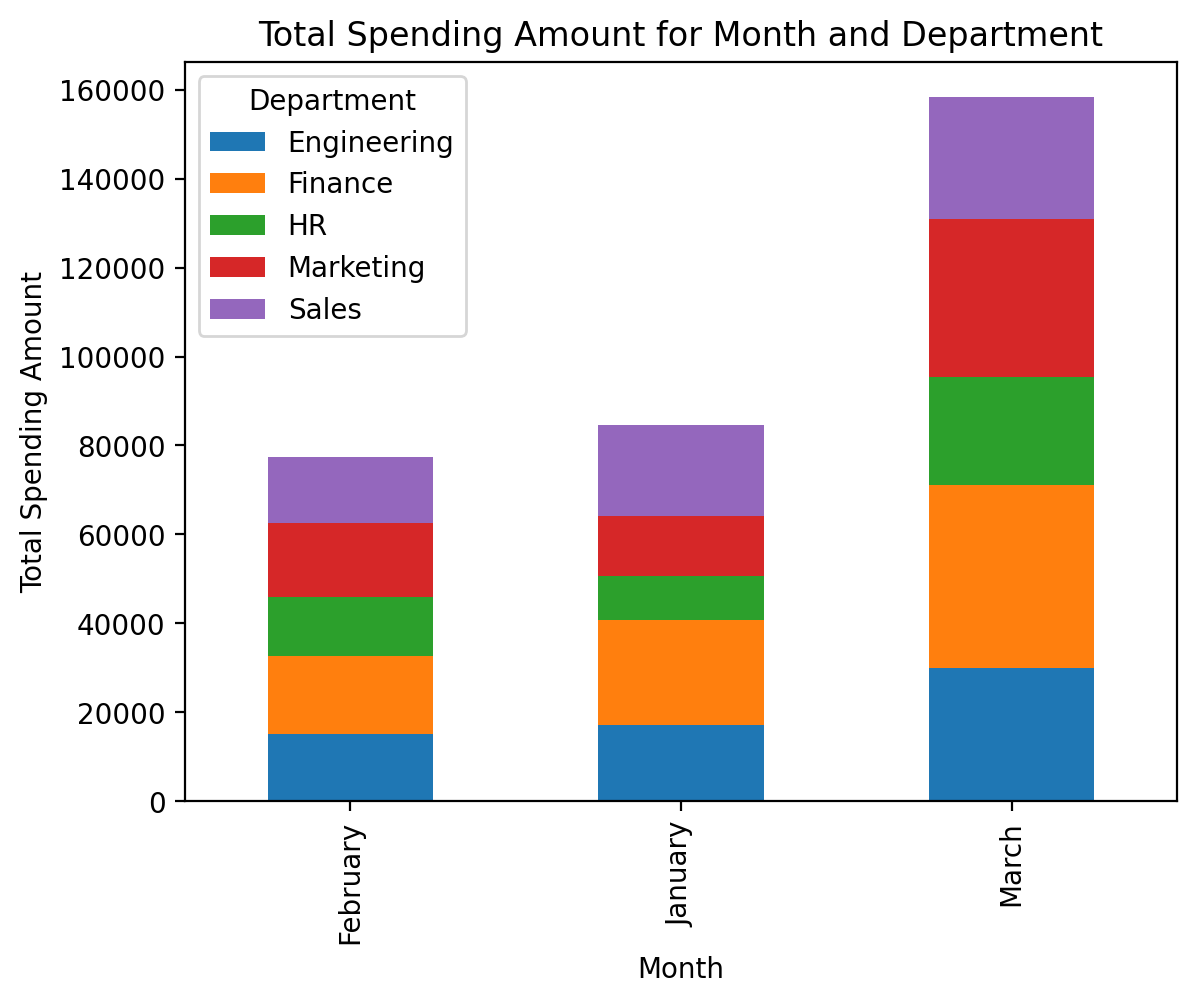

In [40]:
filtered_data = df.groupby(['Month', 'Department'])['Spending Amount'].sum().unstack()
filtered_data.plot(kind='bar', stacked=True)
plt.xlabel('Month') 
plt.ylabel('Total Spending Amount') 
plt.title('Total Spending Amount for Month and Department')

plt.show()

In [60]:
d

,ALIGN,SEX,n
0,Bad,Male,1542
1,Good,Male,1419
2,Good,Female,714
3,Bad,Female,419
4,Neutral,Male,254
5,Neutral,Female,138
6,Bad,Genderless,9
7,Good,Genderless,4
8,Neutral,Genderless,3
9,Reformed,Male,2


In [ ]:
"""
# Calculate metrics by specified columns. In this case, looking at total sum of a numeric column 
inner = df.groupby(["col1", "col2"])["metric1"].sum()
outer = df.groupby("col1")["metric1"].sum()
inner_labels = inner.index.get_level_values(1)

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(12, 6))
size = 0.3

# Outer pie chart
ax.pie(outer, radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Inner pie chart
ax.pie(inner, radius=1 - size,
       labels=inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Set aspect ratio to equal and add a legend
ax.set(aspect="equal", title='...')
ax.legend(inner_labels, title="Department", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

"""

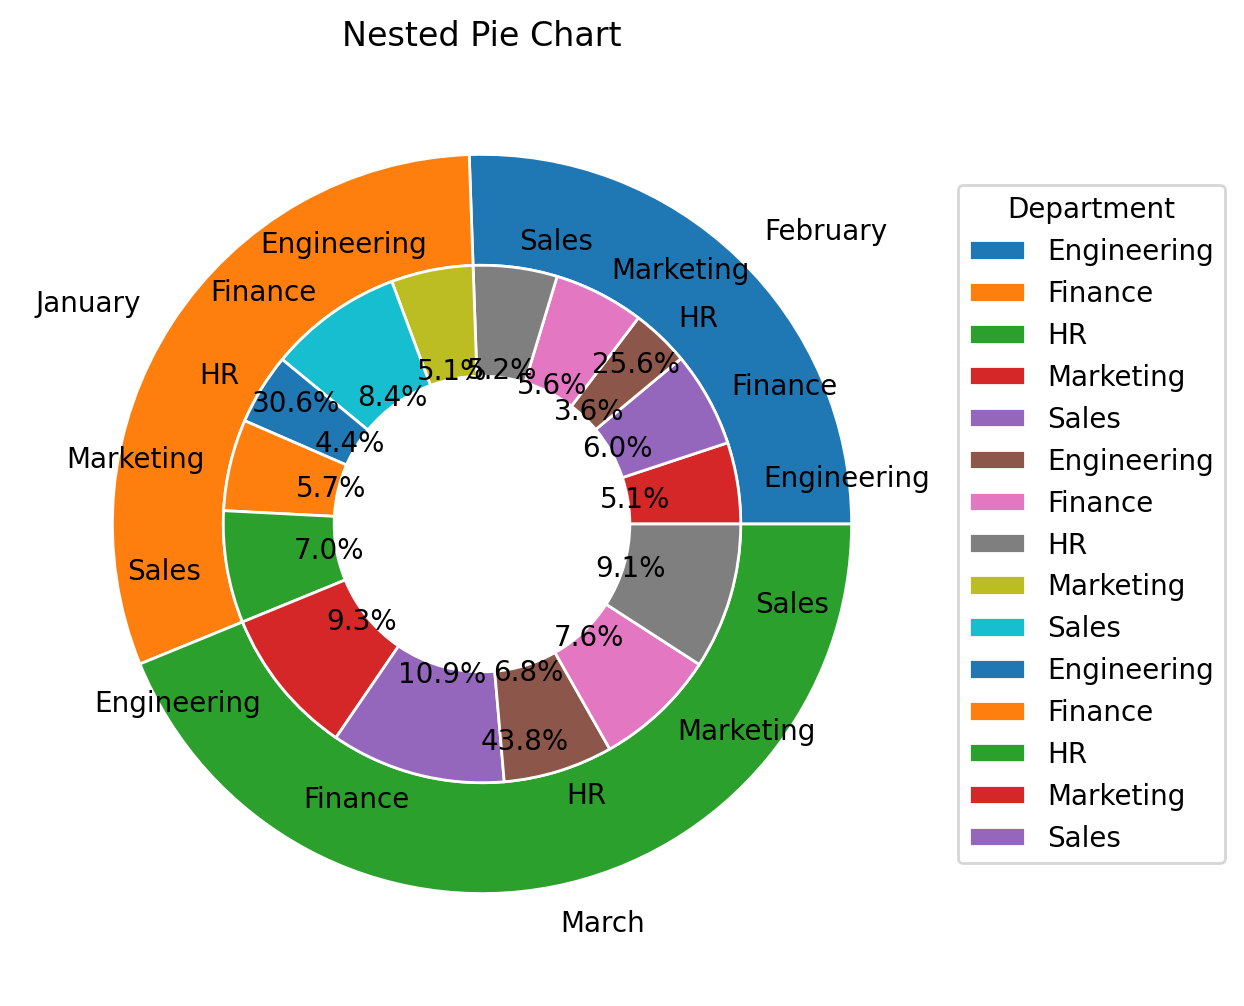

In [72]:
# Calculate total salary by month and department
inner = df.groupby(["Month", "Department"])["Salary"].sum()
outer = df.groupby('Month')["Salary"].sum()
inner_labels = inner.index.get_level_values(1)

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(12, 6))
size = 0.3

# Outer pie chart
ax.pie(outer, radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Inner pie chart
ax.pie(inner, radius=1 - size,
       labels=inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Set aspect ratio to equal and add a legend
ax.set(aspect="equal", title='Nested Pie Chart')
ax.legend(inner_labels, title="Department", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [214]:
import streamlit as st

AttributeError: partially initialized module 'streamlit' has no attribute 'set_page_config' (most likely due to a circular import)

ValueError: 'label' must be of length 'x'

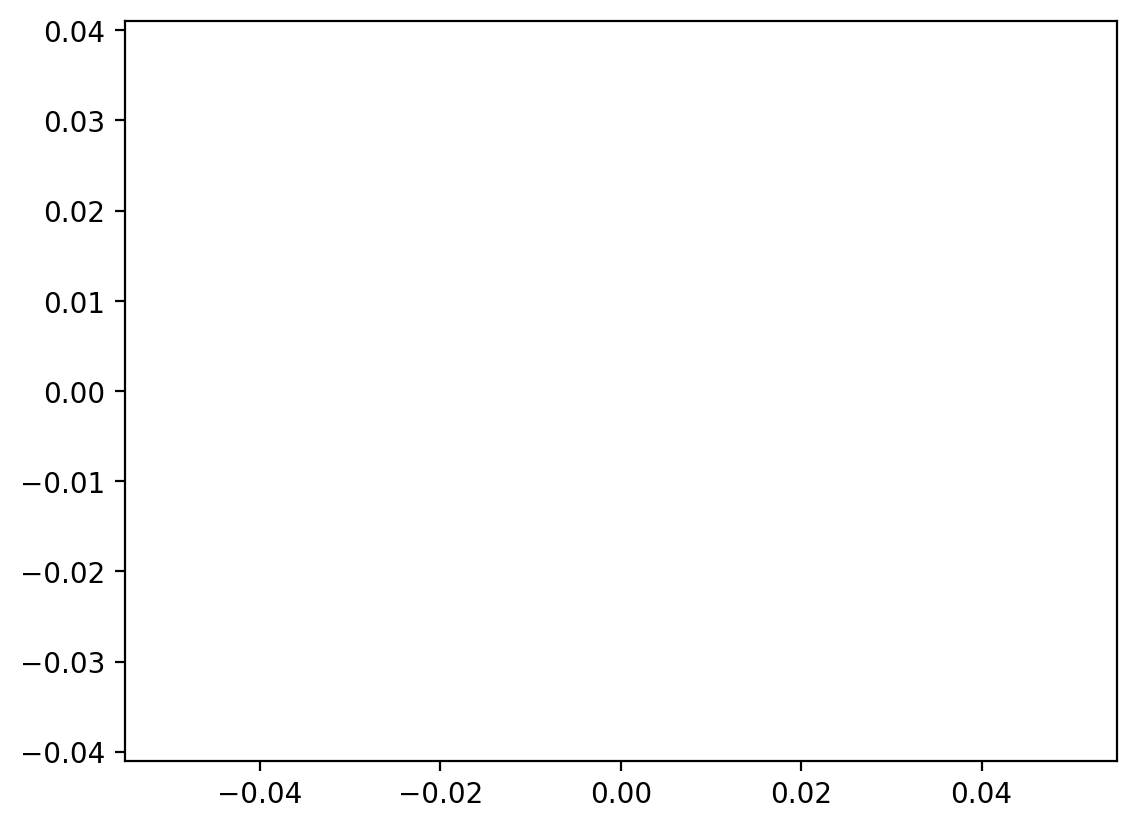

In [42]:
# Group data by Month and Department and sum the Salary
grouped = df.groupby(["Month", "Department"])["Salary"].sum().reset_index()

# Create the outer pie chart (by Month)
outer_labels = grouped["Month"]
outer_sizes = grouped.groupby("Month")["Salary"].sum()
outer_colors = plt.cm.Paired(range(len(outer_labels)))

fig, ax = plt.subplots()
ax.axis('equal')
outer_pie, _ = ax.pie(outer_sizes, labels=outer_labels, autopct='%1.1f%%', startangle=90, colors=outer_colors)

# Create the inner pie chart (by Department for each Month)
inner_labels = grouped["Department"]
inner_sizes = grouped["Salary"]
inner_colors = plt.cm.Paired(range(len(inner_labels)))

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
ax.axis('equal')
inner_pie, _ = ax.pie(inner_sizes, labels=inner_labels, autopct=lambda pct: func(pct, inner_sizes), startangle=90, colors=inner_colors)

plt.title("Nested Pie Chart: Total Salary by Month and Department")
plt.show()


In [46]:
vals

array([[40., 32.],
       [37., 40.],
       [29., 10.]])

In [70]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['Month', 'Department', 'Employee Name'], dtype='object')


In [126]:
# import ipywidgets as widgets
# from IPython.display import display

# # Create a text input widget for user input
# user_input = widgets.Text(
#     placeholder='Enter user input...',
#     description='User Input:',
#     style={'description_width': 'initial'}  # Adjust the description width
# )

# # Create a single select dropdown widget for column selection
# column_selector = widgets.Dropdown(
#     options=df.select_dtypes(include=['object', 'category']).columns,
#     description='Select Column:',
#     style={'description_width': 'initial'}  # Adjust the description width
# )

# # Create a single select dropdown widget for numeric metric selection
# numeric_columns = list(df._get_numeric_data().columns)
# metric_selector = widgets.Dropdown(
#     options=numeric_columns,
#     description='Select Metric:',
#     style={'description_width': 'initial'}  # Adjust the description width
# )

# # Create an empty list to store selected values
# selected_values = []

# # Create an initial empty SelectMultiple widget for values display
# values_selector = widgets.SelectMultiple(
#     options=[],
#     description='Select Value(s):',
#     style={'description_width': 'initial'}  # Adjust the description width
# )

# # Function to update the second SelectMultiple widget with values based on column selection
# def update_values(selected_column):
#     selected_values.clear()
#     selected_values.append({'Column': selected_column})
    
#     # Create the second SelectMultiple widget with values based on the selected column
#     values_selector.options = df[selected_column].unique().tolist()  # Update the options with unique values

# # Button to save selections
# save_button = widgets.Button(
#     description='Save Selections',
#     button_style='success',
# )

# # Output widget to display saved selections
# saved_selections_output = widgets.Output()

# # Function to save selections
# def save_selections(_):
#     with saved_selections_output:
#         selected_metrics = metric_selector.value
#         selected = values_selector.value
#         if selected:
#             user_input_value = user_input.value  # Get user input
#             selection = {'User Input': user_input_value, 'Column': column_selector.value, 'Metrics': selected_metrics, 'Values': selected}
#             selected_values.append(selection)
#             print(f"Saved Selections: {selection}")

# # Attach the update function to the column_selector widget
# column_selector.observe(lambda change: update_values(change.new), 'value')

# # Attach the save function to the save_button widget
# save_button.on_click(save_selections)

# # Display widgets
# display(user_input)
# display(column_selector)
# display(values_selector)
# display(metric_selector)
# display(save_button)
# display(saved_selections_output)


In [100]:
print(saved_selections_output.outputs[0]['text'])

Saved Selections:
Column: Department
Metrics: Spending Amount
Values: Marketing
Saved Selections:
Column: Month
Metrics: Spending Amount
Values: March, February



In [153]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for user input
user_input = widgets.Text(
    placeholder='Enter user input...',
    description='User Input:',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Create a SelectMultiple widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.select_dtypes(include=['object', 'category']).columns,
    description='Select Column(s):',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Create an empty list to store selected values
selected_values = []

# Create an initial empty SelectMultiple widget for values display
values_selector = widgets.SelectMultiple(
    options=[],
    description='Select Value(s):',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Function to update the second SelectMultiple widget with values based on column selection
def update_values(selected_columns):
    selected_values.clear()
    for selected_column in selected_columns:
        selected_values.append({'Column': selected_column})
    
    # Create the second SelectMultiple widget with values based on the selected columns
    selected_column_values = [df[selected_column].unique().tolist() for selected_column in selected_columns]
    values = [value for sublist in selected_column_values for value in sublist]
    values_selector.options = values  # Update the options with unique values

# Button to save selections
save_button = widgets.Button(
    description='Save Selections',
    button_style='success',
)

# Output widget to display saved selections
saved_selections_output = widgets.Output()

# Function to save selections
def save_selections(_):
    with saved_selections_output:
        selected_metrics = metric_selector.value
        selected = values_selector.value
        if selected:
            user_input_value = user_input.value  # Get user input
            selection = {'User Input': user_input_value, 'Columns': column_selector.value, 'Metrics': selected_metrics, 'Values': selected}
            selected_values.append(selection)
            print(f"Saved Selections: {selection}")

# Attach the update function to the column_selector widget
column_selector.observe(lambda change: update_values(change.new), 'value')

# Attach the save function to the save_button widget
save_button.on_click(save_selections)

# Display widgets
display(user_input)
display(column_selector)
display(values_selector)
display(metric_selector)
display(save_button)
display(saved_selections_output)

Text(value='', description='User Input:', placeholder='Enter user input...', style=TextStyle(description_width…

SelectMultiple(description='Select Column(s):', options=('Month', 'Department', 'Employee Name'), style=Descri…

SelectMultiple(description='Select Value(s):', options=(), style=DescriptionStyle(description_width='initial')…

Dropdown(description='Select Metric:', options=('Spending Amount',), style=DescriptionStyle(description_width=…

Button(button_style='success', description='Save Selections', style=ButtonStyle())

Output()

In [150]:
print(saved_selections_output.outputs[0]['text'])

Saved Selections: {'User Input': '', 'Column-Value Pairs': {'Month': ['March'], 'Department': ['February']}, 'Metrics': 'Spending Amount'}



In [160]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import random

# ... Your DataFrame creation code ...

# Create a dictionary to store selected values grouped by columns
selected_values_dict = {}

# Create a text input widget for user input
user_input = widgets.Text(
    placeholder='Enter user input...',
    description='User Input:',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Create a SelectMultiple widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.select_dtypes(include=['object', 'category']).columns,
    description='Select Column(s):',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Create an empty list to store selected values
selected_values = []

# Create an initial empty SelectMultiple widget for values display
values_selector = widgets.SelectMultiple(
    options=[],
    description='Select Value(s):',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Function to update the second SelectMultiple widget with values based on column selection
def update_values(selected_columns):
    selected_values.clear()
    selected_values_dict.clear()  # Clear the dictionary
    
    for selected_column in selected_columns:
        values = df[selected_column].unique().tolist()
        selected_values_dict[selected_column] = values  # Store values by column name
        
        for value in values:
            selected_values.append(f"{selected_column}: {value}")  # Format values as a string

    # Create the second SelectMultiple widget with values based on the selected columns
    values_selector.options = selected_values


# Button to save selections
save_button = widgets.Button(
    description='Save Selections',
    button_style='success',
)

# Output widget to display saved selections
saved_selections_output = widgets.Output()

# Function to save selections
def save_selections(_):
    with saved_selections_output:
        selected_metrics = metric_selector.value
        selected = values_selector.value
        if selected:
            user_input_value = user_input.value  # Get user input
            
            # Group selected values by column
            grouped_selections = {}
            for item in selected:
                parts = item.split(': ')
                column = parts[0]
                value = parts[1]
                if column not in grouped_selections:
                    grouped_selections[column] = []
                grouped_selections[column].append(value)
            
            selection = {'User Input': user_input_value, 'Columns': column_selector.value, 'Metrics': selected_metrics, 'Values': grouped_selections}
            selected_values.append(selection)
            print(f"Saved Selections: {selection}")


# Attach the update function to the column_selector widget
column_selector.observe(lambda change: update_values(change.new), 'value')

# Attach the save function to the save_button widget
save_button.on_click(save_selections)

# Display widgets
display(user_input)
display(column_selector)
display(values_selector)
display(metric_selector)
display(save_button)
display(saved_selections_output)


Text(value='', description='User Input:', placeholder='Enter user input...', style=TextStyle(description_width…

SelectMultiple(description='Select Column(s):', options=('Month', 'Department', 'Employee Name'), style=Descri…

SelectMultiple(description='Select Value(s):', options=(), style=DescriptionStyle(description_width='initial')…

Dropdown(description='Select Metric:', options=('Spending Amount',), style=DescriptionStyle(description_width=…

Button(button_style='success', description='Save Selections', style=ButtonStyle())

Output()

In [166]:
saved_selections_output.outputs[0]['text']

Saved Selections: {'User Input': '', 'Columns': ('Month', 'Department'), 'Metrics': 'Spending Amount', 'Values': {'Month': ['February', 'January'], 'Department': ['Marketing', 'Finance']}}



In [168]:
import pandas as pd

# Sample saved selection output
output = saved_selections_output.outputs[0]['text']

# Parse the output to extract the 'Values' dictionary
import ast
output_dict = ast.literal_eval(output.split("Saved Selections: ")[1])

# Extract the selected values
selected_values_dict = output_dict.get('Values', {})

# Create a filter condition
filter_condition = df.copy()  # Start with a copy of the original DataFrame

for column, values in selected_values_dict.items():
    filter_condition = filter_condition[filter_condition[column].isin(values)]


In [181]:
filter_condition.head(5).to_clipboard(index=False)

In [171]:
import pandas as pd

# Create tableA with columnC
dataA = {'custodian_id': ['ace', 'ace', 'bob'],
         'as_of_date': ['xxxx', 'yyyy', 'xxxx'],
         'columnA': [10, 20, 30],
         'columnC': ['value1', 'value2', 'value3']}  # Adding columnC
tableA = pd.DataFrame(dataA)

# Create tableB
dataB = {'custodian_id': ['ace', 'ace', 'bob'],
         'as_of_date': ['xxxx', 'yyyy', 'xxxx'],
         'columnB': [15, 20, 25]}
tableB = pd.DataFrame(dataB)

# Merge tables based on custodian_id and as_of_date
merged = pd.merge(tableA, tableB, on=['custodian_id', 'as_of_date'], how='inner')

# Check if columnA matches columnB
merged['match'] = merged['columnA'] == merged['columnB']

# Check if all values in columnC are unique for a selected date ('xxxx')
selected_date = 'xxxx'
unique_values = tableA[tableA['as_of_date'] == selected_date]['columnC'].is_unique

# Display the DataFrames and results
print("Table A:")
print(tableA)

print("\nTable B:")
print(tableB)

print("\nMerged Data:")
print(merged)

print(f"\nAre values in columnC unique for date '{selected_date}': {unique_values}")


Table A:
  custodian_id as_of_date  columnA columnC
0          ace       xxxx       10  value1
1          ace       yyyy       20  value2
2          bob       xxxx       30  value3

Table B:
  custodian_id as_of_date  columnB
0          ace       xxxx       15
1          ace       yyyy       20
2          bob       xxxx       25

Merged Data:
  custodian_id as_of_date  columnA columnC  columnB  match
0          ace       xxxx       10  value1       15  False
1          ace       yyyy       20  value2       20   True
2          bob       xxxx       30  value3       25  False

Are values in columnC unique for date 'xxxx': True


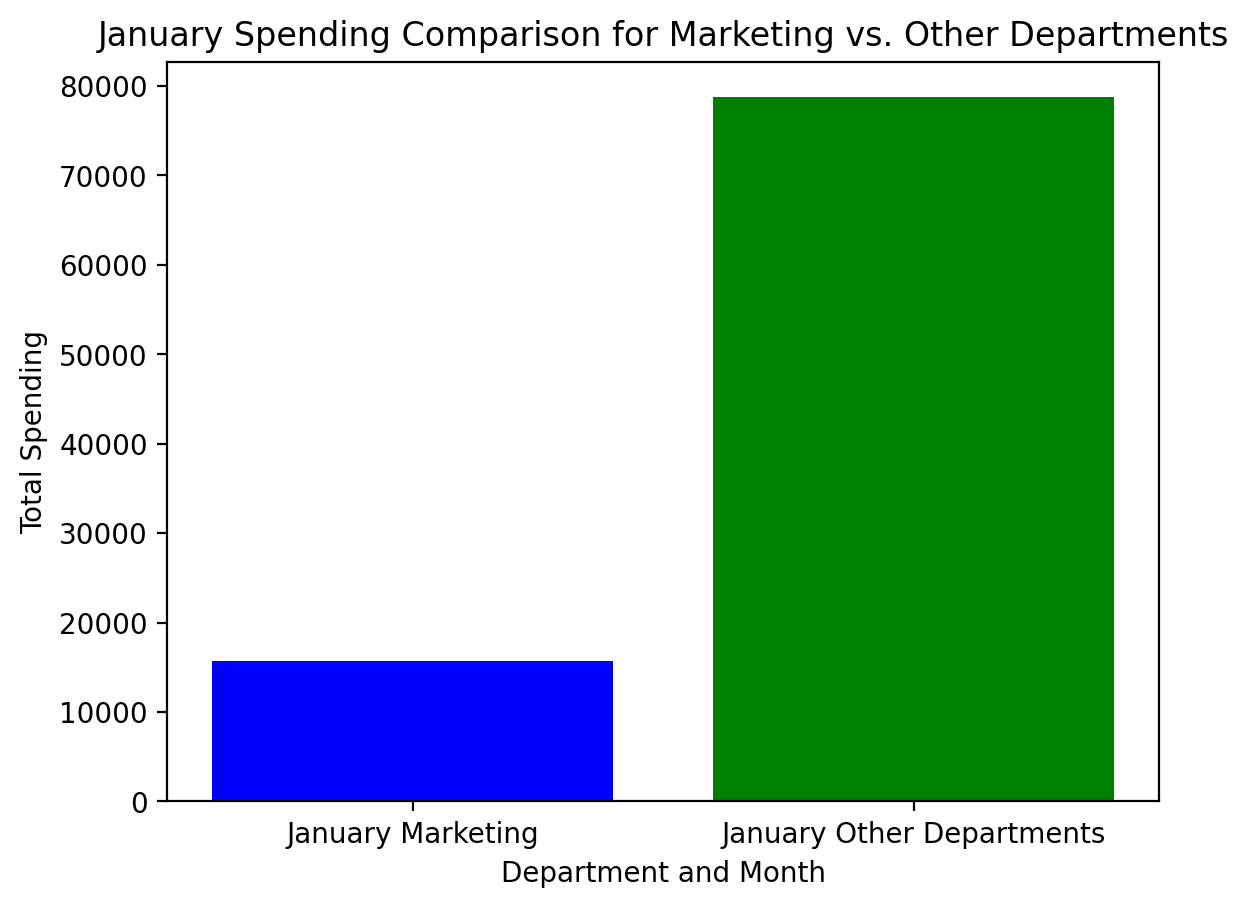

The total spending for January in the Marketing department is: 15720.68
The total spending for January in other departments is: 78691.30


In [186]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame named "df" with your sample data

# Extract the month and department
requested_month = "January"
requested_department = "Marketing"

# Filter the data for the specified month and department
filtered_data = df[(df['Month'] == requested_month) & (df['Department'] == requested_department)]

# Calculate the spending for Marketing in January
marketing_spending_january = filtered_data['Spending Amount'].sum()

# Calculate the spending for other departments in January
other_departments_january = df[(df['Month'] == requested_month) & (df['Department'] != requested_department)]['Spending Amount'].sum()

# Create a bar chart to compare January spending for Marketing with other departments
plt.bar([f'{requested_month} {requested_department}', f'{requested_month} Other Departments'], [marketing_spending_january, other_departments_january], color=['blue', 'green'])
plt.xlabel('Department and Month')
plt.ylabel('Total Spending')
plt.title(f'{requested_month} Spending Comparison for {requested_department} vs. Other Departments')
plt.show()

# Print the spending comparison
print(f"The total spending for {requested_month} in the {requested_department} department is: {marketing_spending_january:.2f}")
print(f"The total spending for {requested_month} in other departments is: {other_departments_january:.2f}")


In [369]:
import openai
import os
import requests

# Replace with your OpenAI API key
api_key = os.environ.get('OPENAI_API_KEY')

# Initialize the OpenAI API client
openai.api_key = api_key

# Define the prompt
user_prompt = a

def get_completion(prompt, model):

    messages = [{"role": "user", "content": prompt}]
    
    response = openai.ChatCompletion.create(
    
    model=model,
    
    messages=messages,
    
    temperature=0
    )
    return response


def sample_df_with_fully_unique_row_across_all_columns(df):
    # Initialize an empty DataFrame to store the sampled rows
    sampled_df = pd.DataFrame(columns=df.columns)
    
    # Initialize a set to keep track of sampled rows as tuples
    sampled_rows = set()
    
    # Loop through the rows and add them to the sampled_df while checking for uniqueness
    for index, row in df.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in sampled_rows:
            sampled_df = pd.concat([sampled_df, row.to_frame().T])
            sampled_rows.add(row_tuple)
    
        # Check if you have enough unique rows; you can adjust the number as needed
        if len(sampled_df) >= 5:
            break
    
    return sampled_df

In [339]:
prompt = f"""Generate code for this request "Create an appropriate visual: {user_query}"

Sample Data:
{sampled_data}

Instructions for Code Generation:
1. Write code to filter the data for the specified column and values.
2. Assume data is just called "df". Don't create any dummy data on your own
3. Just give me the code as output"""

In [375]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for user input
user_input = widgets.Text(
    placeholder='Enter user input...',
    description='User Input:',
    style={'description_width': 'initial'}  # Adjust the description width
)

# Create a button widget
run_button = widgets.Button(
    description="Run Request",
    button_style="info"  # You can customize the button style
)

user_query = user_input.value
sampled_data = sample_df_with_fully_unique_row_across_all_columns(df)

model = "gpt-3.5-turbo"
# model = 'gpt-4'

# Create an output widget to display the result
output = widgets.Output()


# Define a function to update the prompt and execute the code when the button is clicked
def on_button_click(b):
    global updated_prompt
    user_query = user_input.value
    prompt = f"""Generate code for following task: "Create an appropriate visual to show {user_query} using matplotlib"

        Sample Data:
        {sampled_data}
        
        Instructions for Code Generation:
        1. Write code to filter the data for the specified column and values.
        2. Assume data is stored in a DataFrame called "df". Don't create any dummy data on your own
        3. Please provide code as the output"""
    
    # Display the output of the request in the output widget (you can also execute code here)
    with output:   
        print(prompt)
        print(get_completion(prompt = prompt, model = model).choices[0].message['content'])
        print(exec(get_completion(prompt = prompt, model = model).choices[0].message['content']))
        

# Attach the function to the button's click event
run_button.on_click(on_button_click)

# Display the widgets
display(user_input)
display(run_button)
display(output)


Text(value='', description='User Input:', placeholder='Enter user input...', style=TextStyle(description_width…

Button(button_style='info', description='Run Request', style=ButtonStyle())

Output()

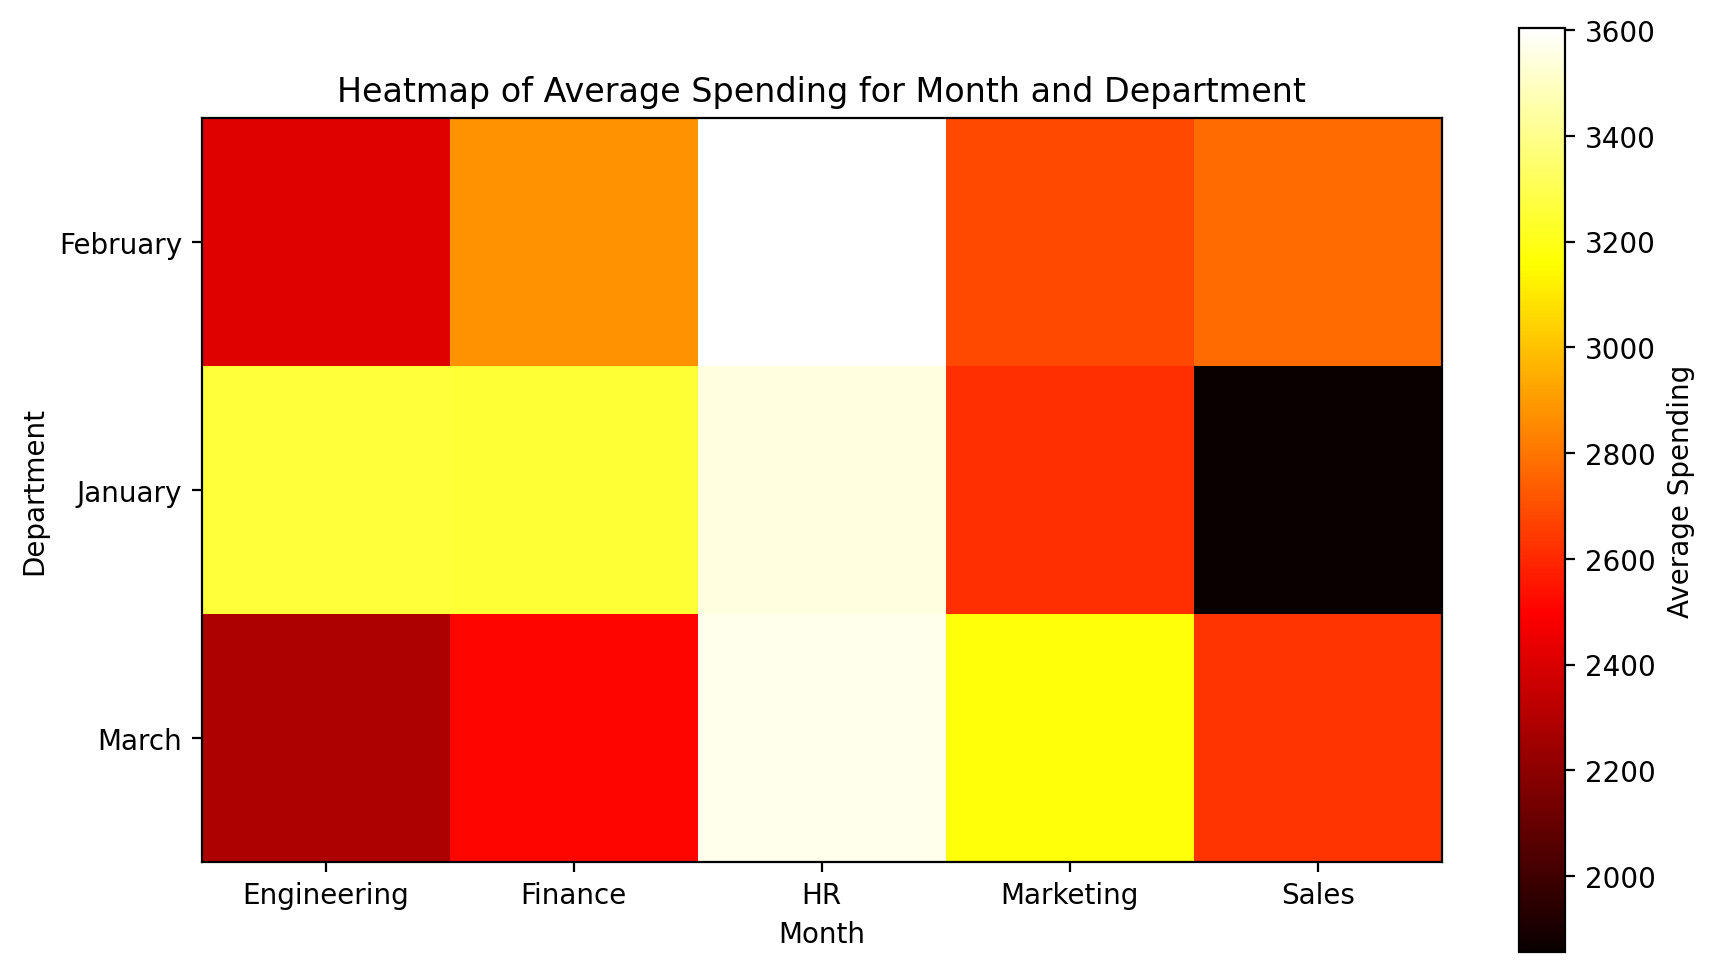

In [372]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for the specified columns and values
filtered_data = df[['Month', 'Department', 'Spending Amount']]

# Group the data by month and department and calculate the average spending
grouped_data = filtered_data.groupby(['Month', 'Department']).mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = filtered_data.pivot_table(index='Month', columns='Department', values='Spending Amount', aggfunc='mean')


# Create the heatmap using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Average Spending')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel('Month')
plt.ylabel('Department')
plt.title('Heatmap of Average Spending for Month and Department')
plt.show()

# Streamlit

In [355]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

# Create a Streamlit web app
st.title('LLM Visual Dashboard with Streamlit')

# Add a text input for user-defined code
user_code = st.text_area('Type Visual Request:', height=20)

# Change the button label to "Create Visual"
if st.button('Create Visual'):
    try:
        # Execute the user-defined code within a try-except block
        exec(user_code)
        # Display the Matplotlib figure
        st.pyplot(plt)
    except Exception as e:
        st.error(f"An error occurred: {str(e)}")


2023-10-07 10:00:34.951 
  command:

    streamlit run /Users/jungh/.pyenv/versions/3.10.12/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


''

In [357]:
# Generate a sample Matplotlib plot (replace with your actual visualization code)
plt.plot([1, 2, 3, 4])
    
# Display the Matplotlib plot using Streamlit
st.pyplot()

DeltaGenerator()

,Month,Department,Employee Name,Spending Amount
0,10,January,Sales,2924.47
1,16,January,Sales,1000.77
2,18,February,Sales,2795.59
3,19,February,Sales,4507.08


,Month,Department,Spending Amount
0,10,January,2924.47
1,16,January,1000.77
2,18,February,2795.59
3,19,February,4507.08


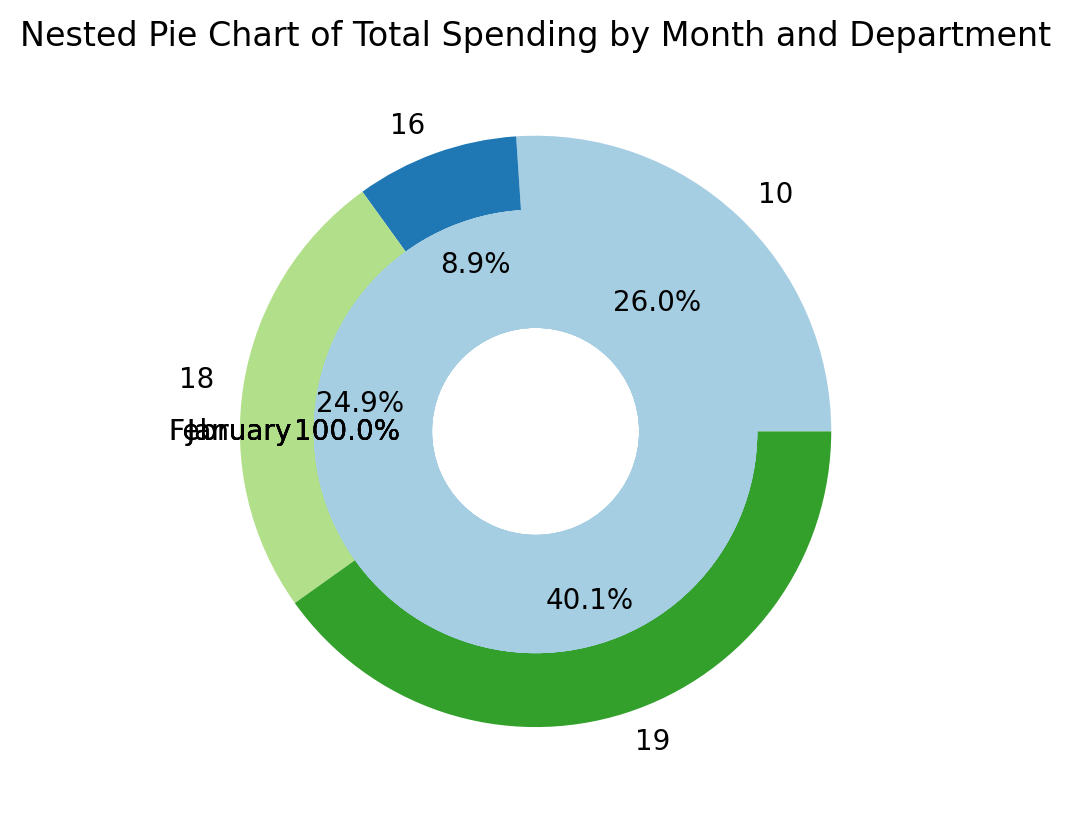

In [12]:
# Group by Month and Department and calculate the total spending
grouped = df.groupby(['Month', 'Department'])['Spending Amount'].sum().reset_index()

# Create a nested pie chart
fig, ax = plt.subplots()
colors = plt.cm.Paired(range(len(grouped)))

# Outer pie chart (by Month)
outer_pie = ax.pie(grouped.groupby('Month')['Spending Amount'].sum(), labels=grouped['Month'].unique(), autopct='%1.1f%%', colors=colors)
plt.setp(outer_pie[0], width=0.3)

# Inner pie chart (by Department within each Month)
for month, month_data in grouped.groupby('Month'):
    inner_pie = ax.pie(month_data['Spending Amount'], labels=month_data['Department'], autopct='%1.1f%%', radius=0.75, pctdistance=0.85, colors=colors)
    plt.setp(inner_pie[0], width=0.4)

ax.set_aspect('equal')  # Equal aspect ratio ensures that pie charts are circular

plt.title('Nested Pie Chart of Total Spending by Month and Department')
plt.show()

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import openai
import os
import requests
import random
import io
import base64
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from IPython.display import display, clear_output, HTML
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.schema import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

CHROMA_PATH = "./chroma_db"
GPT_MODEL = "gpt-3.5-turbo"
SUPPORT_DOC_FOLDER_PATH = "support_docs"


# Generate a list of departments
departments = ['HR', 'Finance', 'Marketing', 'Sales', 'Engineering']

# Create an empty list to store data
data = []

# Generate dummy data
for _ in range(100):
    month = random.choice(['January', 'February', 'March'])
    department = random.choice(departments)
    employee_name = f'Employee{_ + 1}'
    spending_amount = round(random.uniform(1000, 5000), 2)
    # Round the salary to the nearest thousand
    salary = round(random.uniform(30000, 80000) / 1000) * 1000
    
    
    # Check for duplicate employee names in different departments
    while any((d['Employee Name'] == employee_name) and (d['Department'] != department) for d in data):
        employee_name = f'Employee{_ + 1}'
    
    data.append({
        'Month': month,
        'Department': department,
        'Employee Name': employee_name,
        'Spending Amount': spending_amount,
        'Salary': salary  # Add the 'Salary' column
    })

# Create a DataFrame
df = pd.DataFrame(data)


# Replace with your OpenAI API key
api_key = os.environ.get('OPENAI_API_KEY')

# Initialize the OpenAI API client
openai.api_key = api_key


def get_completion(prompt, model):

    messages = [{"role": "user", "content": prompt}]
    
    response = openai.ChatCompletion.create(
    
    model=model,
    
    messages=messages,
    
    temperature=0
    )
    return response


def sample_df_with_fully_unique_row_across_all_columns(df):
    # Initialize an empty DataFrame to store the sampled rows
    sampled_df = pd.DataFrame(columns=df.columns)
    
    # Initialize a set to keep track of sampled rows as tuples
    sampled_rows = set()
    
    # Loop through the rows and add them to the sampled_df while checking for uniqueness
    for index, row in df.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in sampled_rows:
            sampled_df = pd.concat([sampled_df, row.to_frame().T])
            sampled_rows.add(row_tuple)
    
        # Check if you have enough unique rows; you can adjust the number as needed
        if len(sampled_df) >= 5:
            break
    
    return sampled_df

################################################################################################################################


# Define the dynamic code as a string
sampled_data = sample_df_with_fully_unique_row_across_all_columns(df)

# Create a list to store generated charts
generated_charts = []


def process_doc_files(SUPPORT_DOC_FOLDER_PATH) -> dict:
    """
    Process text files in a folder and return a dictionary with file names as keys and content as values.

    :param folder_path: The path to the folder containing the text files.
    :return: A dictionary with file names as keys and content as values.
    """
    # Initialize an empty dictionary to store the results
    doc_dict = {}

    # Check if the folder exists
    if not os.path.exists(SUPPORT_DOC_FOLDER_PATH):
        return doc_dict  # Return an empty dictionary if the folder does not exist

    # List all files in the folder
    file_list = os.listdir(SUPPORT_DOC_FOLDER_PATH)

    # Iterate through the files
    for filename in file_list:
        # Check if the file has a .txt extension
        if filename.endswith(".txt"):
            # Create the full path to the file
            file_path = os.path.join(SUPPORT_DOC_FOLDER_PATH, filename)

            # Open the file and read its content
            with open(file_path, 'r', encoding='utf-8') as file:
                file_content = file.read()

            # Store the content in the dictionary with the filename as the key
            doc_dict[filename] = file_content

    return doc_dict


# Define the function to extract the "document_objects" object
def extract_document_objects(all_file_mapping):

    document_objects = []

    for title, doc in all_file_mapping.items():
        merged_doc = ""
        merged_doc += title + "\n" + doc
        document_object = Document(page_content= merged_doc)
        document_objects.append(document_object)    

    return document_objects

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)


all_docs = process_doc_files(SUPPORT_DOC_FOLDER_PATH)

document_objects = extract_document_objects(all_docs)

if folder_exists(folder_path = CHROMA_PATH):
    # Get the vectorstore saved previously
    vectorstore = Chroma(persist_directory=CHROMA_PATH, embedding_function=OpenAIEmbeddings())
else:
    # Create new vectorstore
    vectorstore = Chroma.from_documents(documents=document_objects, embedding=OpenAIEmbeddings(), persist_directory = CHROMA_PATH)

/var/folders/f7/ktht5d1s70d5b54zrw1g_fjh0000gn/T/ipykernel_22226/1328748546.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [108]:
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.7, 'k':1})

question = 'create nested pie chart that breaks down total spending for month and department'
# question = 'how is the weather'
a = retriever.get_relevant_documents(question)
a

[Document(page_content='Utilize this sample code as foundation: \n\nHow to create nested pie chart\n\n# Calculate metrics by specified columns. In this case, looking at total sum of a numeric column \ninner = df.groupby(["col1", "col2"])["metric1"].sum()\nouter = df.groupby("col1")["metric1"].sum()\ninner_labels = inner.index.get_level_values(1)\n\n# Create the nested pie chart\nfig, ax = plt.subplots(figsize=(10, 4))\nsize = 0.3\n\n# Outer pie chart\nax.pie(outer, radius=1,\n       labels=outer.index,\n       autopct=\'%1.1f%%\',\n       wedgeprops=dict(width=size, edgecolor=\'w\'))\n\n# Inner pie chart\nax.pie(inner, radius=1 - size,\n       labels=inner_labels,\n       autopct=\'%1.1f%%\',\n       wedgeprops=dict(width=size, edgecolor=\'w\'))\n\n# Set aspect ratio to equal and add a legend\nax.set(aspect="equal", title=\'...\')\nax.legend(inner_labels, title="Department", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))\n\nplt.show()', metadata={})]

In [121]:
# Sample LLM output (replace this with your actual LLM-generated code)
llm_outputs = [
    "plt.figure(figsize=(6, 4))\nplt.plot([1, 2, 3, 4], [1, 4, 9, 16])\nplt.title('Chart 1')",
    "plt.figure(figsize=(6, 4))\nplt.plot([1, 2, 3, 4], [16, 9, 4, 1])\nplt.title('Chart 2')",
]
print(llm_outputs[0])

plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('Chart 1')


In [115]:
print(a[0].page_content)

Utilize this sample code as foundation: 

How to create nested pie chart

# Calculate metrics by specified columns. In this case, looking at total sum of a numeric column 
inner = df.groupby(["col1", "col2"])["metric1"].sum()
outer = df.groupby("col1")["metric1"].sum()
inner_labels = inner.index.get_level_values(1)

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(10, 4))
size = 0.3

# Outer pie chart
ax.pie(outer, radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Inner pie chart
ax.pie(inner, radius=1 - size,
       labels=inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Set aspect ratio to equal and add a legend
ax.set(aspect="equal", title='...')
ax.legend(inner_labels, title="Department", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [111]:
sampled_data.to_clipboard()

In [83]:
document_objects

[Document(page_content='mobile_app_user_guide.txt\nTechLink Communications Mobile App User Guide\n\nOur mobile app makes managing your TechLink Communications account easier than ever. Follow this guide to get started:\n\n1. Download the App:\n   - Visit your device\'s app store and search for "TechLink Communications."\n   - Download and install the app.\n\n2. Account Management:\n   - Log in using your TechLink Communications credentials.\n   - Access account details, billing information, and usage data.\n\n3. Bill Payment:\n   - Make secure payments from your mobile device.\n   - Set up recurring payments for convenience.\n\n4. Troubleshooting:\n   - Use the app to troubleshoot common issues, such as slow internet or TV problems.\n\nFor more information and FAQs, visit www.techlinkcommunications.com/support/mobile-app.\n\nIf you need assistance or have questions about the app, contact our app support team at appsupport@techlinkcommunications.com or call (123) 456-7890.\n\nManage you

In [211]:
import pandas as pd
import random

# Generate a list of departments
departments = ['HR', 'Finance', 'Marketing', 'Sales', 'Engineering']

# Create an empty list to store data
data = []

# Generate dummy data
for _ in range(100):
    month = random.choice(['January', 'February', 'March'])
    department = random.choice(departments)
    employee_name = f'Employee{_ + 1}'
    spending_amount = round(random.uniform(1000, 5000), 2)
    
    # Check for duplicate employee names in different departments
    while any((d['Employee Name'] == employee_name) and (d['Department'] != department) for d in data):
        employee_name = f'Employee{_ + 1}'
    
    data.append({
        'Month': month,
        'Department': department,
        'Employee Name': employee_name,
        'Spending Amount': spending_amount
    })

# Create a DataFrame
df = pd.DataFrame(data)


<string>:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.


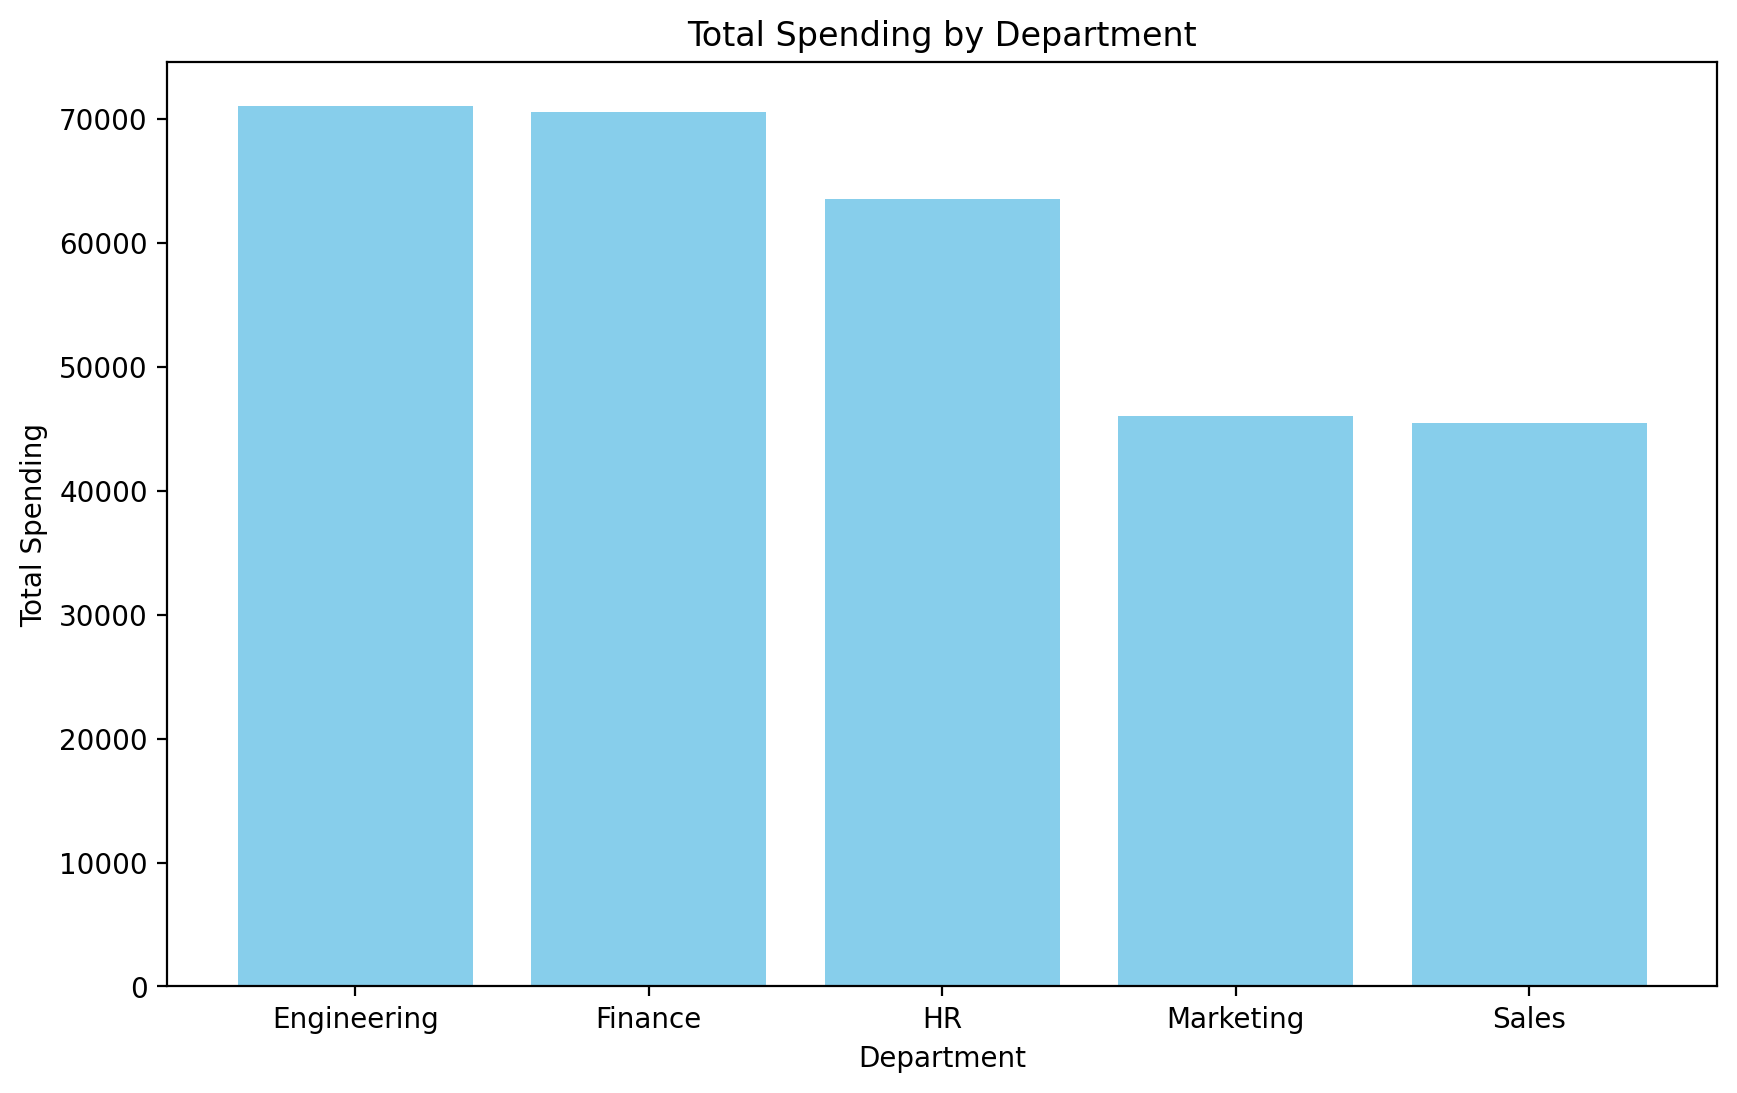

In [212]:
df_json_string = df.to_json()

# Sample LLM output (replace this with your actual LLM-generated code)
llm_output = """
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by Department and calculate the total spending in each department
department_spending = df.groupby("Department")["Spending Amount"].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(department_spending.index, department_spending.values, color='skyblue')
plt.title("Total Spending by Department")
plt.xlabel("Department")
plt.ylabel("Total Spending")
plt.show()
"""

df_string = f"""
import pandas as pd
df = pd.read_json('{df_json_string}')
"""

merged_llm_output = df_string + llm_output

# Execute the modified Matplotlib code
exec_globals = {}
exec(merged_llm_output, exec_globals)


df = pd.read_json('{"Month":{"20":"January","15":"February","72":"February","37":"March"},"Department":{"20":"HR","15":"Sales","72":"Finance","37":"Marketing"},"Employee Name":{"20":"Employee21","15":"Employee16","72":"Employee73","37":"Employee38"},"Spending Amount":{"20":4774.62,"15":2788.59,"72":3891.35,"37":1381.06},"Salary":{"20":51000,"15":60000,"72":39000,"37":70000}}')

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(df['x'], df['y'])
plt.title('Sample Matplotlib Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')



In [195]:
sample_df = df.sample(4)
df_json_string = sample_df.to_json()

llm_output = f"""
df = pd.read_json('{df_json_string}')
print(df)
    
"""

In [194]:
df_json_string

'{"Month":{"37":"March","20":"January","15":"February","72":"February"},"Department":{"37":"Marketing","20":"HR","15":"Sales","72":"Finance"},"Employee Name":{"37":"Employee38","20":"Employee21","15":"Employee16","72":"Employee73"},"Spending Amount":{"37":1381.06,"20":4774.62,"15":2788.59,"72":3891.35},"Salary":{"37":70000,"20":51000,"15":60000,"72":39000}}'

In [196]:
exec(llm_output)

       Month Department Employee Name  Spending Amount  Salary
20   January         HR    Employee21          4774.62   51000
15  February      Sales    Employee16          2788.59   60000
72  February    Finance    Employee73          3891.35   39000
37     March  Marketing    Employee38          1381.06   70000


<string>:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.


In [163]:
df_json_string

'{"Month":{"68":"February","61":"March","41":"January","85":"February"},"Department":{"68":"Finance","61":"Marketing","41":"Finance","85":"HR"},"Employee Name":{"68":"Employee69","61":"Employee62","41":"Employee42","85":"Employee86"},"Spending Amount":{"68":4074.29,"61":3045.47,"41":2038.71,"85":2918.11},"Salary":{"68":79000,"61":55000,"41":50000,"85":31000}}'

In [172]:
pd.read_json('{"Month":{"20":"January","37":"March","72":"February","15":"February"},"Department":{"20":"HR","37":"Marketing","72":"Finance","15":"Sales"},"Employee Name":{"20":"Employee21","37":"Employee38","72":"Employee73","15":"Employee16"},"Spending Amount":{"20":4774.62,"37":1381.06,"72":3891.35,"15":2788.59},"Salary":{"20":51000,"37":70000,"72":39000,"15":60000}}')

/var/folders/f7/ktht5d1s70d5b54zrw1g_fjh0000gn/T/ipykernel_22226/3350510474.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json('{"Month":{"20":"January","37":"March","72":"February","15":"February"},"Department":{"20":"HR","37":"Marketing","72":"Finance","15":"Sales"},"Employee Name":{"20":"Employee21","37":"Employee38","72":"Employee73","15":"Employee16"},"Spending Amount":{"20":4774.62,"37":1381.06,"72":3891.35,"15":2788.59},"Salary":{"20":51000,"37":70000,"72":39000,"15":60000}}')


,Month,Department,Employee Name,Spending Amount,Salary
20,January,HR,Employee21,4774.62,51000
37,March,Marketing,Employee38,1381.06,70000
72,February,Finance,Employee73,3891.35,39000
15,February,Sales,Employee16,2788.59,60000
